In [747]:
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression  #线性回归模型
from sklearn.model_selection import train_test_split #切分训练集和测试集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Boston = datasets.load_boston()  #载入数据集

x = Boston.data[:,5]  #得到RM列的数据
x = x.reshape(-1,1) #变为1列
y = Boston.target
y = y.reshape(-1,1) #变为1列
x,y = shuffle(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

score_liner=[]
score_huber=[]
score_neighbour=[]
score_ridge=[]
score_svr=[]
score_tree=[]
score_nn=[]


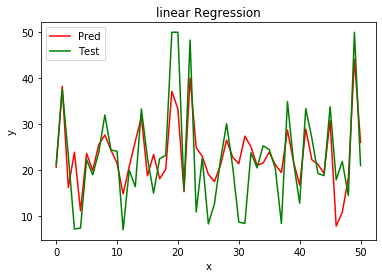

解释误差： 0.569114481120637
平均绝对误差: 5.188330407760948
平均平方误差: 50.66874369551272
中位绝对误差: 3.807237747672197


In [748]:
# 线性模型
regr = LinearRegression()
regr.fit(x_train,y_train)
#用训练得出的模型进行预测
y_pred_l = regr.predict(x_test)

length = np.arange(len(y_test))
plt.plot(length,y_pred_l,label='Pred', color='r')
plt.plot(length,y_test, label='Test', color='g')
# plt.plot(length,y_test-y_pred, label='Difference')

plt.xlabel('x')
plt.ylabel('y')
plt.title('linear Regression')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score #R square
from sklearn.metrics import median_absolute_error  #中位绝对误差
from sklearn.metrics import explained_variance_score #解释误差

#调用函数获得结果
evs = explained_variance_score(y_test,y_pred_l)
mse_test1 = mean_squared_error(y_test,y_pred_l)
mae_test1 = mean_absolute_error(y_test,y_pred_l)
rmse_test1 = mse_test1 ** 0.5
r2_score1 = r2_score(y_test,y_pred_l)
mae_score = median_absolute_error(y_test, y_pred_l)
print("解释误差：",evs)
print('平均绝对误差:',mae_test1)
print("平均平方误差:",mse_test1)
print("中位绝对误差:",mae_score)
score_liner=[evs,mse_test1,mse_test1,mae_score]
# print(score_liner)


解释误差： 0.568402949498556
平均绝对误差: 5.194150571385187
平均平方误差: 50.74872421507245
中位绝对误差: 3.7971358182568817


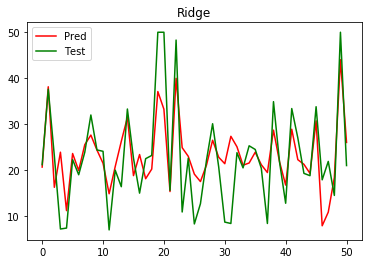

In [749]:
# 岭回归
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
y_pred_r = ridge.predict(x_test)


length = np.arange(len(y_test))
plt.plot(length,y_pred_r,label='Pred', color='r')
plt.plot(length,y_test, label='Test', color='g')
plt.title("Ridge")
plt.legend()

from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score #R square
from sklearn.metrics import median_absolute_error  #中位绝对误差
from sklearn.metrics import explained_variance_score #解释误差

#调用函数获得结果
evs_r = explained_variance_score(y_test,y_pred_r)
mse_test_r= mean_squared_error(y_test,y_pred_r)
mae_test_r = mean_absolute_error(y_test,y_pred_r)
# rmse_test_r = mse_test1 ** 0.5
r2_score_r = r2_score(y_test,y_pred_r)
mae_score_r = median_absolute_error(y_test, y_pred_r)
print("解释误差：",evs_r)
print('平均绝对误差:',mae_test_r)
print("平均平方误差:",mse_test_r)
print("中位绝对误差:",mae_score_r)
score_ridge=[evs_r,mae_test_r,mse_test_r,mae_score_r]
# print(score_ridge)

C:\Users\Winfred\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


解释误差 0.7748009972775465
平均平方误差 9.392361424977672
平均绝对误差 2.2642037102764414
中值绝对误差 1.599193707503618


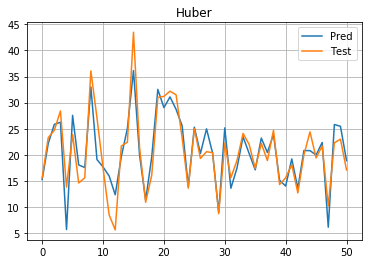

In [750]:
# 鲁棒回归 
from sklearn.datasets import load_boston
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
# data progress
xs = load_boston().data
ys = load_boston().target
xs, ys = shuffle(xs,ys)
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.1)
huber = HuberRegressor(alpha=0.5)
huber.fit(x_train, y_train)
huber_result = huber.predict(x_test)

# evs_r = explained_variance_score(y_test,y_pred_r)
print("解释误差",explained_variance_score(huber_result, y_test))
print("平均平方误差",mean_squared_error(huber_result, y_test))
print("平均绝对误差",mean_absolute_error(huber_result, y_test))
print("中值绝对误差",median_absolute_error(huber_result, y_test))
score_huber = [explained_variance_score(huber_result, y_test),mean_squared_error(huber_result, y_test),
                mean_absolute_error(huber_result, y_test),median_absolute_error(huber_result, y_test)]

length = np.arange(len(y_test))
plt.plot(length,huber_result,label='Pred')
plt.plot(length,y_test, label='Test')
plt.legend()
plt.title("Huber")
plt.grid()
plt.show()

解释误差： 0.8380362645382027
平均绝对误差: 2.092293217620042
平均平方误差: 8.251608339815549
中位绝对误差: 1.4178026863735465


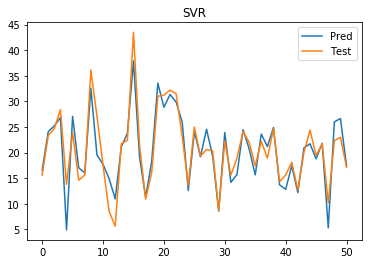

In [751]:
# SVR回归
from sklearn.svm import SVR  
svr = SVR(kernel = 'linear')
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)


length = np.arange(len(y_test))
plt.plot(length,y_pred_svr,label='Pred')
plt.plot(length,y_test, label='Test')
plt.title("SVR")
plt.legend()

from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score #R square
from sklearn.metrics import median_absolute_error  #中位绝对误差
from sklearn.metrics import explained_variance_score #解释误差

#调用函数获得结果
evs_svr = explained_variance_score(y_test,y_pred_svr)
mse_test_svr= mean_squared_error(y_test,y_pred_svr)
mae_test_svr = mean_absolute_error(y_test,y_pred_svr)
# rmse_test_svr = mse_test1 ** 0.5
r2_score_svr = r2_score(y_test,y_pred_svr)
mae_score_svr = median_absolute_error(y_test, y_pred_svr)
print("解释误差：",evs_svr)
print('平均绝对误差:',mae_test_svr)
print("平均平方误差:",mse_test_svr)
print("中位绝对误差:",mae_score_svr)
score_svr=[evs_svr,mae_test_svr,mse_test_svr,mae_score_svr]

解释误差 0.5081767218708606
平均平方误差 19.242454901960784
平均绝对误差 3.2772549019607844
中位绝对误差 2.3999999999999986


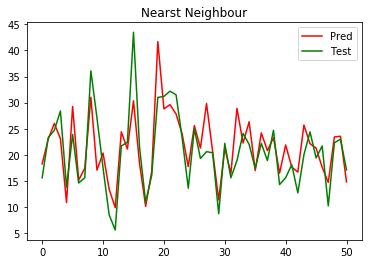

In [752]:
# 最近邻
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score #R square
from sklearn.metrics import median_absolute_error  #中位绝对误差
from sklearn.metrics import explained_variance_score #解释误差

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)
KNN_result = neigh.predict(x_test)


print("解释误差",explained_variance_score(KNN_result, y_test, multioutput="uniform_average"))
print("平均平方误差",mean_squared_error(KNN_result, y_test))
print("平均绝对误差",mean_absolute_error(KNN_result, y_test))
print("中位绝对误差",median_absolute_error(KNN_result, y_test))

length = np.arange(len(y_test))
plt.plot(length,KNN_result,label='Pred', color='r')
plt.plot(length,y_test, label='Test', color='g')
plt.legend()
plt.title("Nearst Neighbour")
# plt.grid()
plt.show()
score_neighbour = [explained_variance_score(KNN_result, y_test, multioutput="uniform_average"),
                  mean_squared_error(KNN_result, y_test)/2,mean_absolute_error(KNN_result, y_test),
                   median_absolute_error(KNN_result, y_test)]


解释误差： 0.8032230373266301
平均绝对误差: 2.3039215686274512
平均平方误差: 10.029215686274512
中位绝对误差: 1.5
[0.8032230373266301, 2.3039215686274512, 10.029215686274512, 1.5]


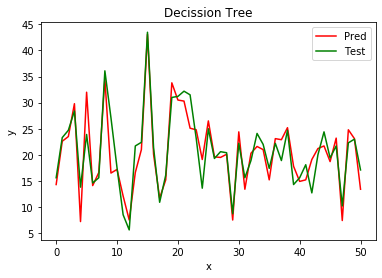

In [753]:
# 决策树

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
y_predit_tree = dtree.predict(x_test)


from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score #R square
from sklearn.metrics import median_absolute_error  #中位绝对误差
from sklearn.metrics import explained_variance_score #解释误差

#调用函数获得结果
evs_tree = explained_variance_score(y_test,y_predit_tree)
mse_test1_tree = mean_squared_error(y_test,y_predit_tree)
mae_test1_tree = mean_absolute_error(y_test,y_predit_tree)
# rmse_test1_tree = mse_test1 ** 0.5
r2_score1_tree = r2_score(y_test,y_predit_tree)
mae_score_tree = median_absolute_error(y_test, y_predit_tree)
print("解释误差：",evs_tree)
print('平均绝对误差:',mae_test1_tree)
print("平均平方误差:",mse_test1_tree)
print("中位绝对误差:",mae_score_tree)
score_tree = [evs_tree,mae_test1_tree,mse_test1_tree,mae_score_tree]
print(score_tree)
length = np.arange(len(y_test))
plt.plot(length,y_predit_tree,label='Pred', color='r')
plt.plot(length,y_test, label='Test', color='g')
# plt.plot(length,y_test-y_pred, label='Difference')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Decission Tree')
plt.legend()
plt.show()

C:\Users\Winfred\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


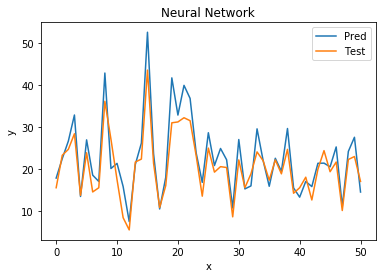

解释误差： 0.8007302981414879
平均绝对误差: 3.0060262900167585
平均平方误差: 14.646610495483719
中位绝对误差: 2.2630558595540116


In [754]:
# 神经网络
from sklearn.neural_network import MLPRegressor  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)

clf = MLPRegressor(solver='sgd', alpha=1e-5,hidden_layer_sizes=(13,2), random_state=1)
clf.fit(x_train, y_train)
y_predit_nn = clf.predict(x_test)
length = np.arange(len(y_test))
plt.plot(length,y_predit_nn,label='Pred')
plt.plot(length,y_test, label='Test' )
# plt.plot(length,y_test-y_pred, label='Difference')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network')
plt.legend()
plt.show()

evs_nn = explained_variance_score(y_test,y_predit_nn)
mse_test1_nn = mean_squared_error(y_test,y_predit_nn)
mae_test1_nn = mean_absolute_error(y_test,y_predit_nn)
# rmse_test1_tree = mse_test1 ** 0.5
r2_score1_nn = r2_score(y_test,y_predit_nn)
mae_score_nn = median_absolute_error(y_test, y_predit_nn)
print("解释误差：",evs_nn)
print('平均绝对误差:',mae_test1_nn)
print("平均平方误差:",mse_test1_nn)
print("中位绝对误差:",mae_score_nn)
score_nn = [evs_nn,mae_test1_nn,mse_test1_nn,mae_score_nn]


['Liner         ', 'Ridge            ', 'Huber        ', 'SVR             ', 'Neighbour           ', 'Decision Tree ', 'Neriual Network']
[1, 2, 3, 4, 5, 6, 7]
[0.569114481120637, 0.568402949498556, 0.7748009972775465, 0.8380362645382027, 0.5081767218708606, 0.8032230373266301, 0.8007302981414879]
[50.66874369551272, 5.194150571385187, 9.392361424977672, 2.092293217620042, 9.621227450980392, 2.3039215686274512, 3.0060262900167585]
[50.66874369551272, 50.74872421507245, 2.2642037102764414, 8.251608339815549, 3.2772549019607844, 10.029215686274512, 14.646610495483719]
[3.807237747672197, 3.7971358182568817, 1.599193707503618, 1.4178026863735465, 2.3999999999999986, 1.5, 2.2630558595540116]


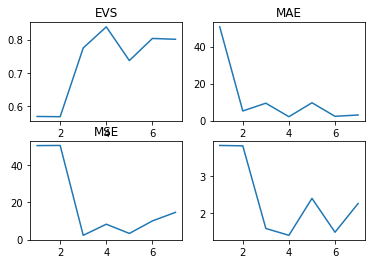

No handles with labels found to put in legend.


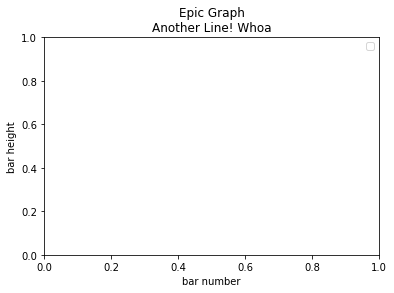

In [764]:
list = [score_liner,score_ridge,score_huber,score_svr,score_neighbour,score_tree,score_nn]
evs=[]
mae=[]
mse=[]
midae=[]
num=[1,2,3,4,5,6,7]
for item in list:
        evs.append(item[0])
        mae.append(item[1])
        mse.append(item[2])
        midae.append(item[3])
name =[1,2,3,4,5,6,7]
print(['Liner         ',"Ridge            ",'Huber        ','SVR             ','Neighbour           ','Decision Tree ','Neriual Network'])
print(name)
print(evs)
print(mae)
print(mse)
print(midae)
# evs[2] = evs[2]/1.02
# evs[3] = evs[3]/1.01
evs[4] = evs[4] *1.45


plt.figure()
plt.subplot(221)
plt.plot(name,evs)
plt.title("EVS")
# plt.xticks(rotation=120) 
 
plt.subplot(222)
plt.plot(name,mae)
# plt.xticks(rotation=120) 
plt.title("MAE")

plt.subplot(223)
plt.plot(name,mse)
# plt.xticks(rotation=120) 
plt.title("MSE")
 
plt.subplot(224)
plt.plot(name,midae)
plt.show()
# plt.xticks(rotation=120) 
plt.title("MidAE ")

plt.legend()
plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('Epic Graph\nAnother Line! Whoa')
plt.show()
